# Plotly graphics
- One of the major players in interactive graphs is [Plotly](https://plotly.com/python/).
- Some alternatives are Bokeh and Altair.
- Interfacing it comes in two main flavours:
    - _graph_objects_: low-level graphics handling
    - _plotly.express_: high-level graphics handling
- In addition _plotly_ is integrated in the _dash_ environment with its dialect.
- Figures are dictionaries, which we will leverage.

## Plotting with AI assistance
- Many plot commands can be obtained by describing plots to AIs.
- AIs can also translate from one plotting framework to another.
- Sketching a set of plot and adding sufficient descriptions, may result in usable code.

## Basic plotting

In [1]:
# Gapminder dataset of health and wealth stats for different countries
import plotly.express as px
df = px.data.gapminder()
df.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

### Line plot

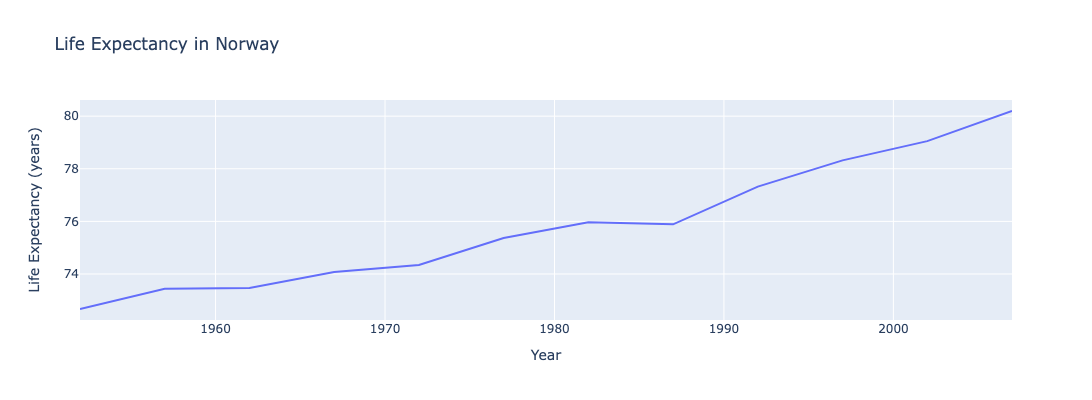

In [2]:
# Create a line plot of life expectancy over time for Norway.
# Let the figure be 400 pixels high and 700 pixels wide.
# Set the title to 'Life Expectancy in Norway'.
# Set the x-axis label to 'Year'.
# Set the y-axis label to 'Life Expectancy (years)'.
fig = px.line(df[df['country'] == 'Norway'], x='year', y='lifeExp', title='Life Expectancy in Norway', width=700, height=400)
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Life Expectancy (years)')
fig.show()

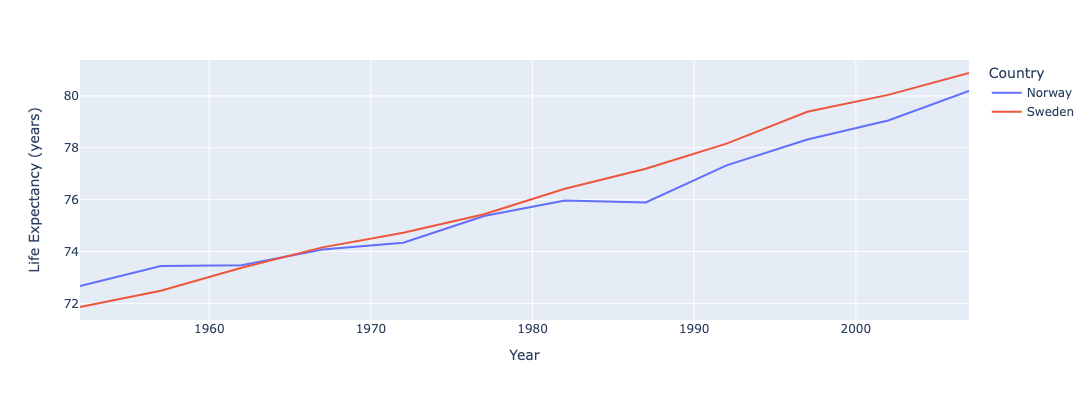

In [3]:
# Create a plot with one line for Norway and one line for Sweden in the same style as the plot above.
# Let the legend title be 'Country'.
fig = px.line(df[df['country'].isin(['Norway', 'Sweden'])], x='year', y='lifeExp', color='country', width=700, height=400)
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Life Expectancy (years)')
fig.update_layout(legend_title_text='Country')
fig.show()

In [4]:
# The dictionary defining the figure
print(fig)

Figure({
    'data': [{'hovertemplate': 'country=Norway<br>year=%{x}<br>lifeExp=%{y}<extra></extra>',
              'legendgroup': 'Norway',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'Norway',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]),
              'xaxis': 'x',
              'y': array([72.67 , 73.44 , 73.47 , 74.08 , 74.34 , 75.37 , 75.97 , 75.89 , 77.32 ,
                          78.32 , 79.05 , 80.196]),
              'yaxis': 'y'},
             {'hovertemplate': 'country=Sweden<br>year=%{x}<br>lifeExp=%{y}<extra></extra>',
              'legendgroup': 'Sweden',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
           

In [5]:
print(fig['data'][0]['line']['color'])

#636efa


### Directly editing the dictionary

In [6]:
fig['data'][0]['line']['color'] = "#000000"

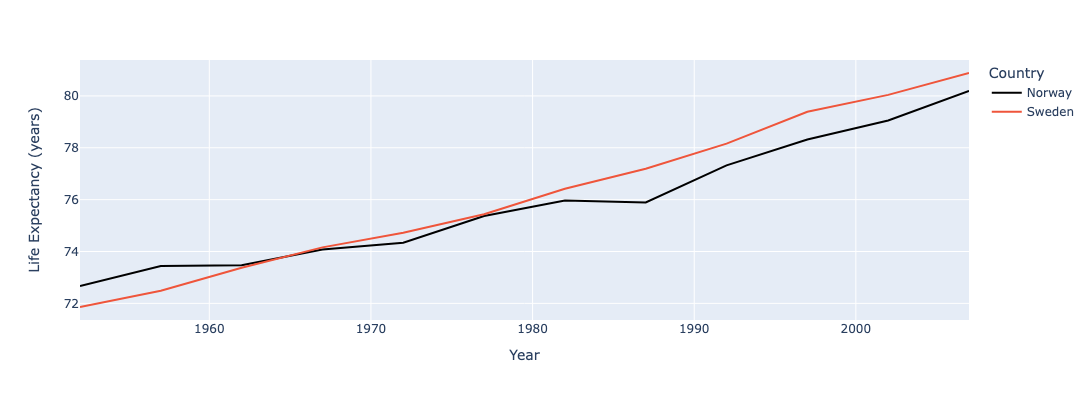

In [7]:
fig.show()

### Shaded areas
- The fill parameter can be used to fill to the next line, to zero or to itself if the series reverses.
- The latter is most convenient for single colour background shading.

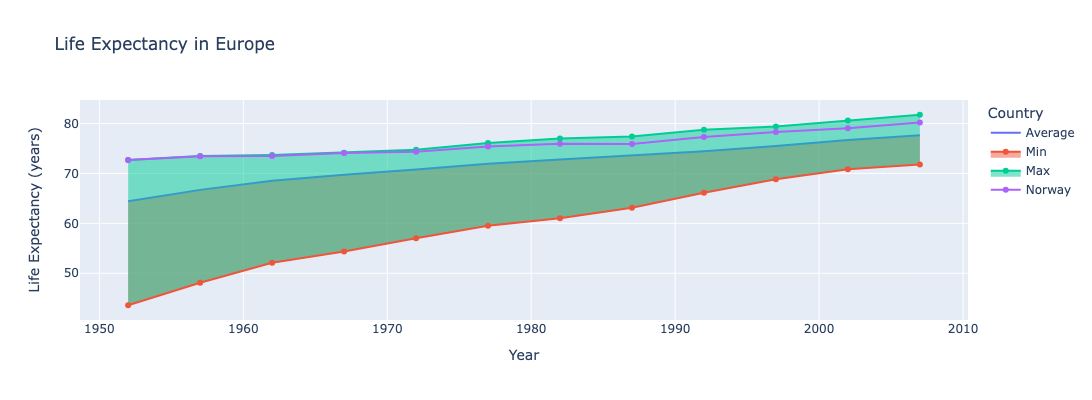

In [8]:
# Plot the mean life expectancy in Europe over time. Shade the area between minimum and maximum life expectancy in Europe over time.
# Overlay Norway's life expectancy over the plot.
# https://plotly.com/python/continuous-error-bars/
dfE = df[df['continent'] == 'Europe'][['year', 'lifeExp']].groupby('year')
dfEmean = dfE.mean().reset_index()
dfEmean['Legend'] = 'Average' # Hack to include line in legend, see color below.

fig = px.line(dfEmean, x='year', y='lifeExp', title='Life Expectancy in Europe', color='Legend', width=700, height=400)
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Life Expectancy (years)')
fig.update_layout(legend_title_text='Country')

# Fill between dfE.min().reset_index() and dfE.max().reset_index()
fig.add_scatter(x=dfE.min().reset_index()['year'], y=dfE.min().reset_index()['lifeExp'], name='Min', fill='tonexty')
fig.add_scatter(x=dfE.max().reset_index()['year'], y=dfE.max().reset_index()['lifeExp'], name='Max', fill='tonexty')
fig.add_scatter(x=df[df['country'] == 'Norway']['year'], y=df[df['country'] == 'Norway']['lifeExp'], name='Norway')
fig.show()

```{note}
Look at the way .reset_index() is used to promote years back to a variable again. 
```

### Bar plot

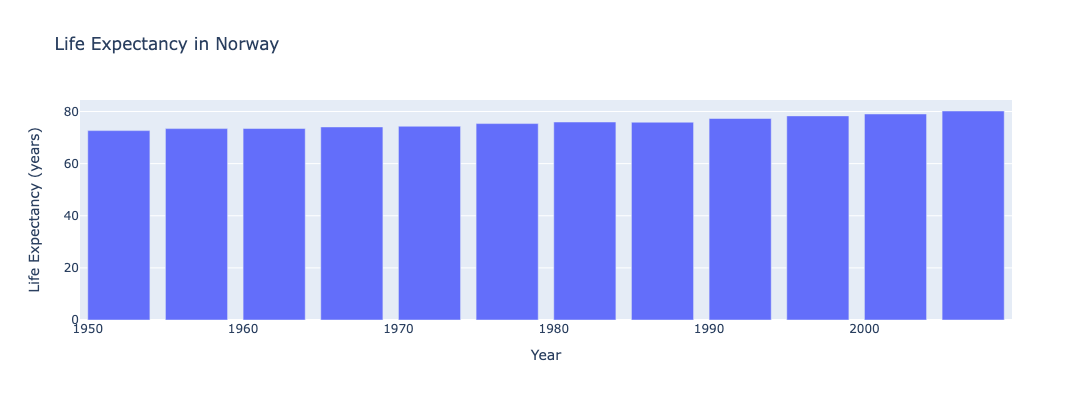

In [9]:
# Make a barplot of the life expectancy in Norway over time.
fig = px.bar(df[df['country'] == 'Norway'], x='year', y='lifeExp', title='Life Expectancy in Norway', width=700, height=400)
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Life Expectancy (years)')
fig.show()

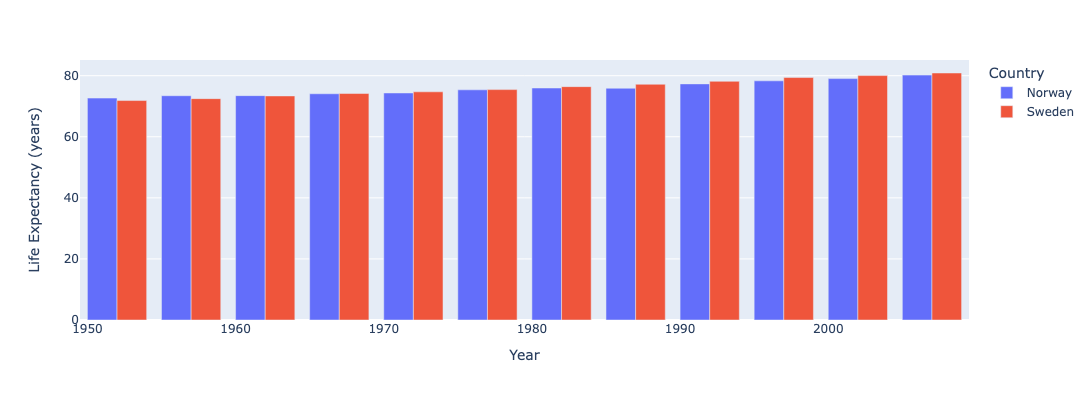

In [10]:
# Make a barplot with both Norway and Sweden in the same plot. Let the countries be side by side for each year.
fig = px.bar(df[df['country'].isin(['Norway', 'Sweden'])], x='year', y='lifeExp', color='country', barmode='group', width=700, height=400)
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Life Expectancy (years)')
fig.update_layout(legend_title_text='Country')
fig.show()

```{note}
Remove "barmode" for stacking.
```

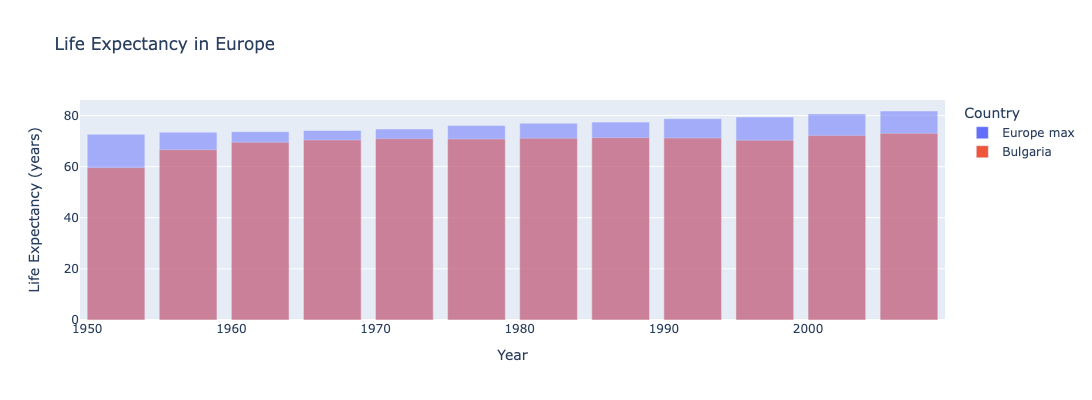

In [11]:
# Create a barplot with maximum life expectancy in Europe for each year.
# Overlay the life expectancy in Bulgaria over the plot with narrower bars using barmode='overlay'.
dfE = df[df['continent'] == 'Europe'][['year', 'lifeExp']].groupby('year')
dfEmax = dfE.max().reset_index()
dfEmax['Bulgaria'] = df[df['country'] == 'Bulgaria']['lifeExp'].reset_index()['lifeExp']
dfEmax.columns = ['year', 'Europe max', 'Bulgaria']
fig = px.bar(dfEmax, x='year', y=['Europe max', 'Bulgaria'], title='Life Expectancy in Europe', barmode='overlay', width=700, height=400)
fig.update_xaxes(title='Year')
fig.update_yaxes(title='Life Expectancy (years)')
fig.update_layout(legend_title_text='Country')
fig.show()

In [12]:
# Inspect the figure
print(fig)

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=Europe max<br>year=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Europe max',
              'marker': {'color': '#636efa', 'opacity': 0.5, 'pattern': {'shape': ''}},
              'name': 'Europe max',
              'offsetgroup': 'Europe max',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007]),
              'xaxis': 'x',
              'y': array([72.67 , 73.47 , 73.68 , 74.16 , 74.72 , 76.11 , 76.99 , 77.41 , 78.77 ,
                          79.39 , 80.62 , 81.757]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'variable=Bulgaria<br>year=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'Bulgaria',
              'marker': {'co

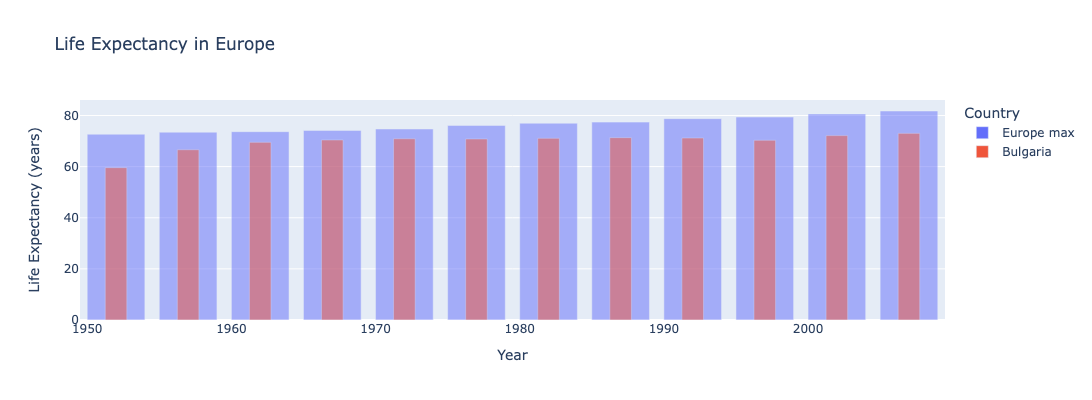

In [13]:
# Adust the width of the Bulgaria bars to 2.
fig['data'][1]['width'] = 1.5
fig.show()

### Polar barplots
- The x-axis in barplots do not have to be straight.

In [14]:
angles = (dfEmax['year']-1952)/55*360*11/12
width = [360/12-5]*12
r = dfEmax['Europe max']

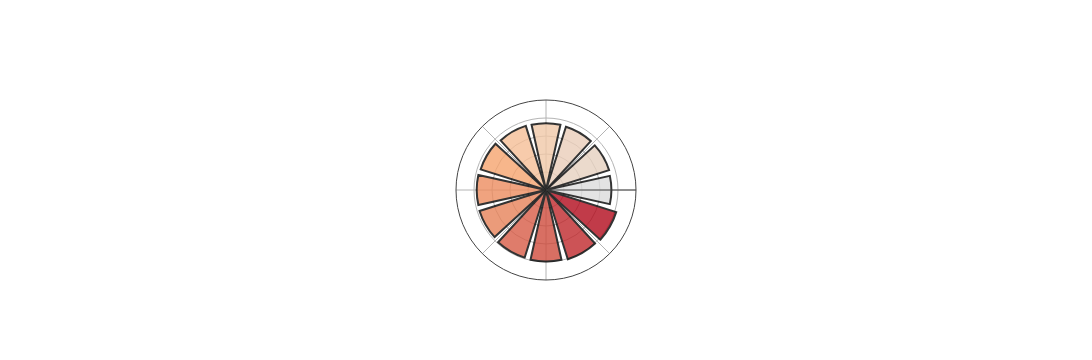

In [15]:
import plotly.graph_objects as go

fig = go.Figure(go.Barpolar(
    r=r,
    theta=angles,
    width=width,
    marker_color=dfEmax['Europe max'],
    marker_line_color="black",
    marker_line_width=2,
    opacity=0.8
))

fig.update_layout(
    template=None,
    polar = dict(
        radialaxis = dict(range=[0, 100], showticklabels=False, ticks=''),
        angularaxis = dict(showticklabels=False, ticks='')
    )
)

fig.show()

# Change me to plotly express, please!

### Scatter plot

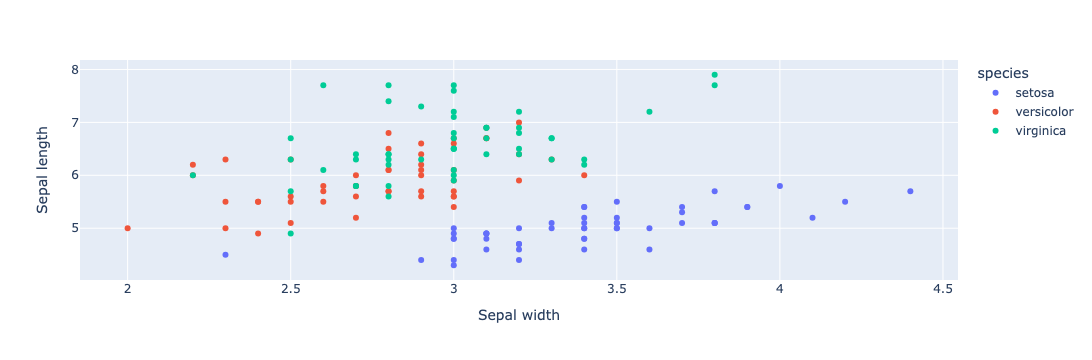

In [16]:
# Create a Plotly express scatter plot of the iris data
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color='species')
fig.update_xaxes(title='Sepal width')
fig.update_yaxes(title='Sepal length')
fig.show()

In [17]:
# Inspect the scatter plot.
# Note three legendgroups and the markers. Many more options are available.
print(fig)

Figure({
    'data': [{'hovertemplate': 'species=setosa<br>sepal_width=%{x}<br>sepal_length=%{y}<extra></extra>',
              'legendgroup': 'setosa',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'setosa',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. , 3. ,
                          4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. , 3.4, 3.5,
                          3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. , 3.4, 3.5, 2.3,
                          3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3]),
              'xaxis': 'x',
              'y': array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8, 4.3,
                          5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. , 5. , 5.2,
                          5.2, 4.7, 4.8

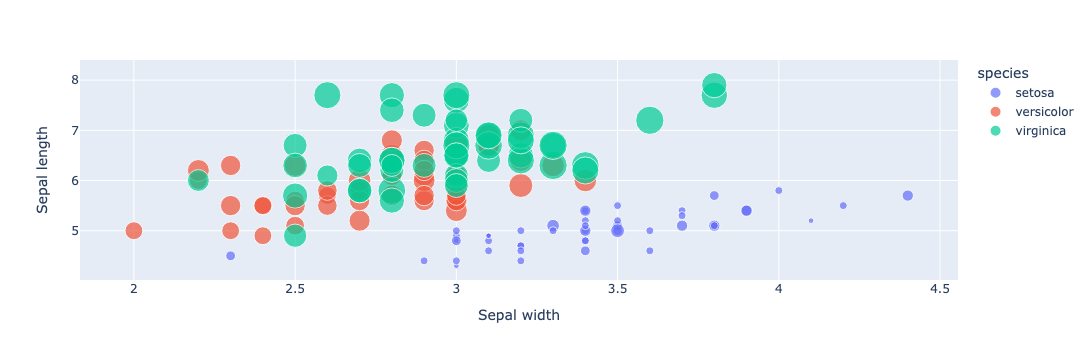

In [18]:
# Manipulate symbols
fig = px.scatter(df, x="sepal_width", y="sepal_length", 
                 color='species', size="petal_width")
fig.update_xaxes(title='Sepal width')
fig.update_yaxes(title='Sepal length')
fig.show()

## Boxplots and violin plots

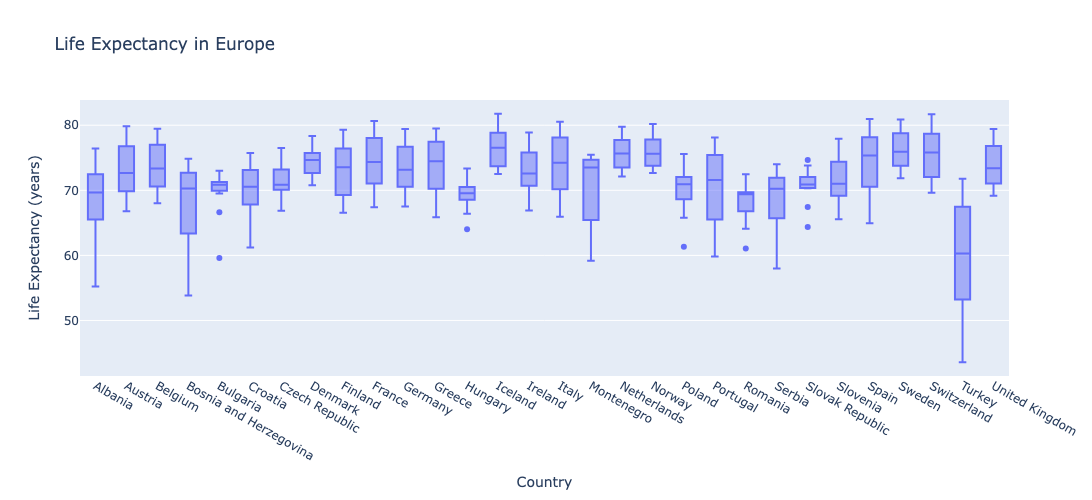

In [19]:
# Make a boxplot of the life expectancy per country in Europe
df = px.data.gapminder()
dfE = df[df['continent'] == 'Europe']
fig = px.box(dfE, x='country', y='lifeExp', title='Life Expectancy in Europe', width=800, height=500)
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Life Expectancy (years)')
fig.show()

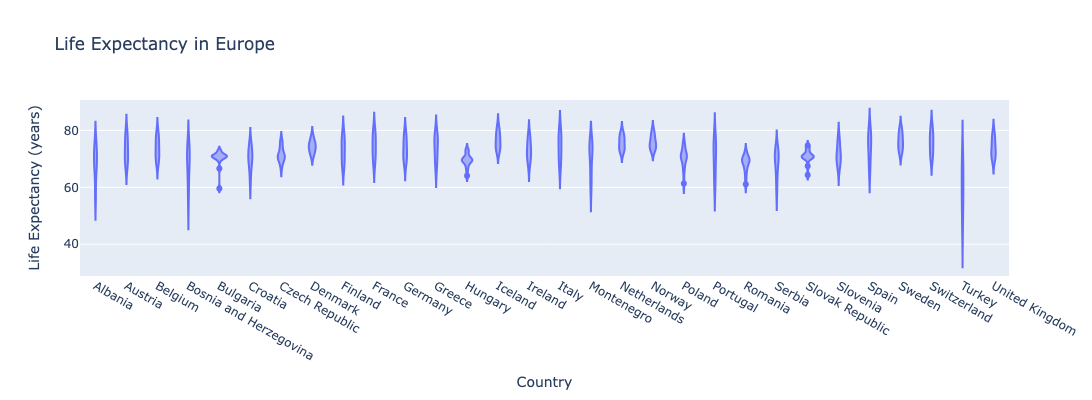

In [20]:
# Make a violinplot of the life expectancy per country in Europe 
# with the same style as the boxplot above.
fig = px.violin(dfE, x='country', y='lifeExp', title='Life Expectancy in Europe', width=800, height=400)
fig.update_xaxes(title='Country')
fig.update_yaxes(title='Life Expectancy (years)')
fig.show()

### Marginal plots
- Scatter plots support simple marginal plots, e.g., histograms and similar.

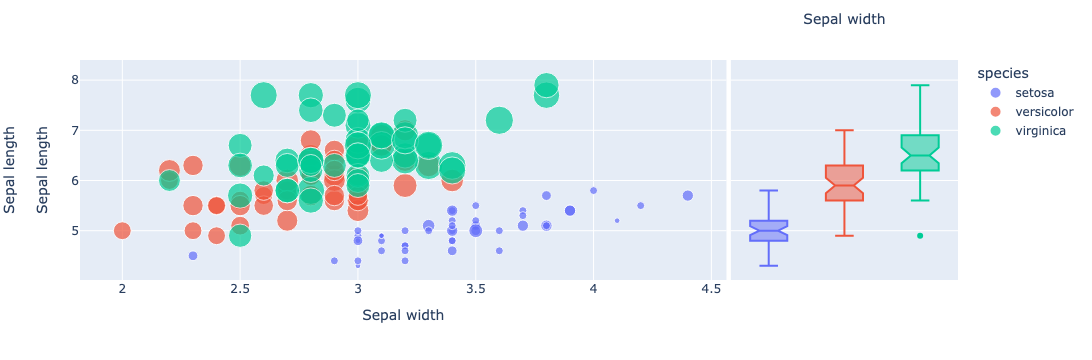

In [21]:
# Add a marginal violin plot to the scatter plot.
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", 
                 color='species', size="petal_width", marginal_y='box')
fig.update_xaxes(title='Sepal width')
fig.update_yaxes(title='Sepal length')
fig.show()

## Exercise
- Test other marginal plot types and locations.

## Heatmap

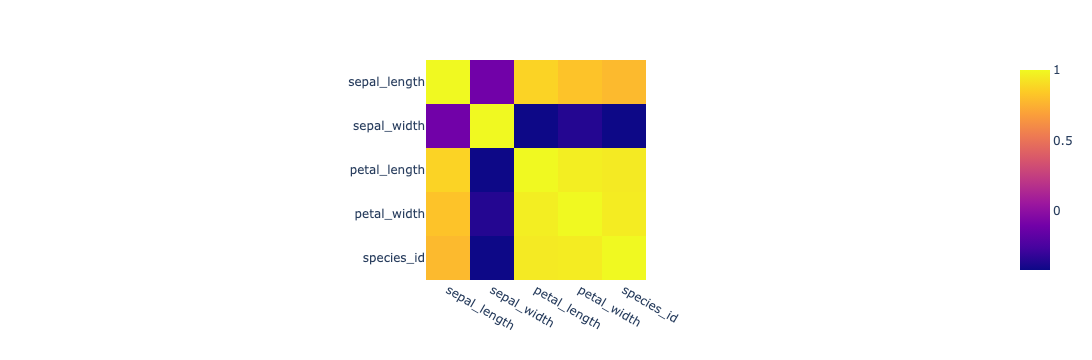

In [22]:
# Make a correlation heatmap of the iris data
df = px.data.iris()
fig = px.imshow(df.corr(numeric_only=True))
fig.show()

## Tables
- One can plot tables with styling.

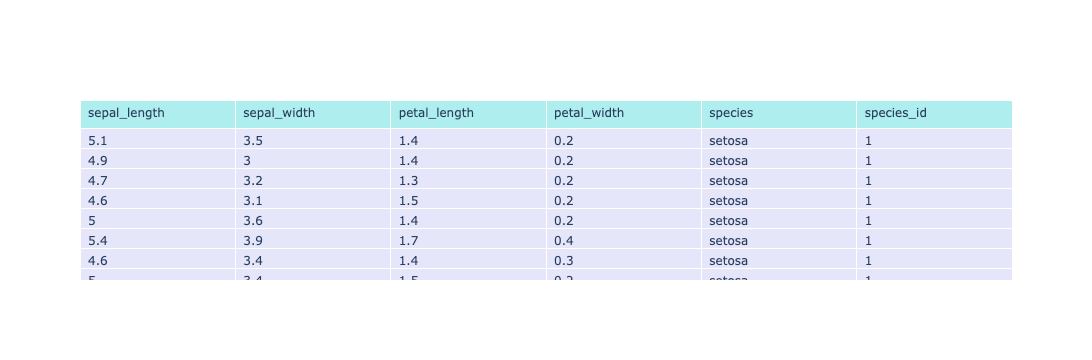

In [23]:
# Make a Plotly express table view for the iris data
# https://plotly.com/python/table
import plotly.graph_objects as go
df = px.data.iris()
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df.sepal_length, df.sepal_width, df.petal_length, df.petal_width, df.species, df.species_id],
               fill_color='lavender',
               align='left'))
])

fig.show()

## Layouts
- For Plotly express there is no direct layout option, except for facets (see below).
- Instead one need to go to the low-level graph objects.

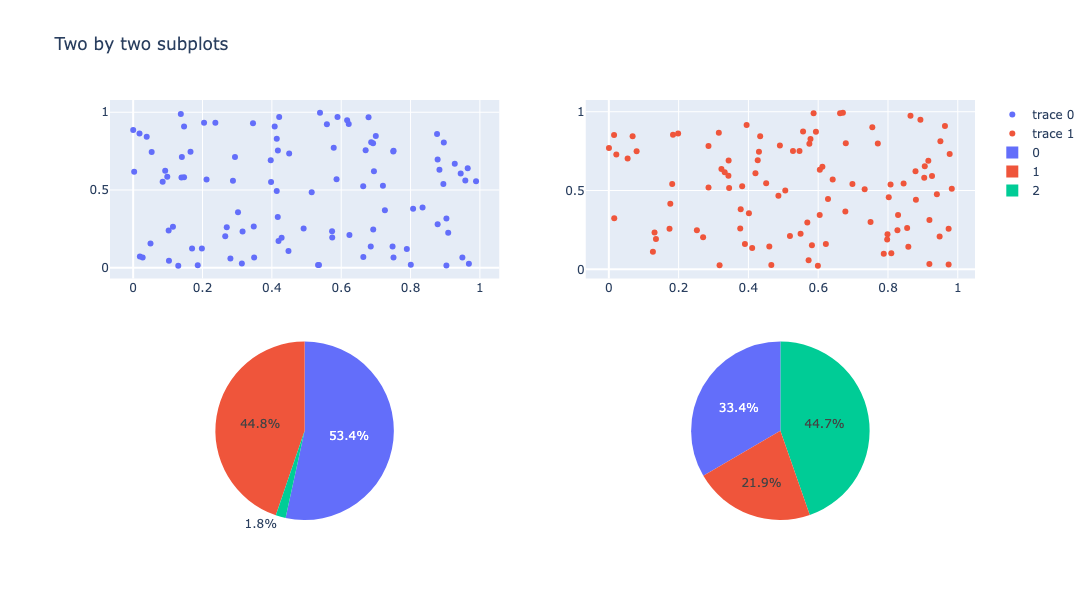

In [24]:
# Make a two by two plotly express plot with two scatter plots and two pie charts, all four with random data
# https://plotly.com/python/subplots/
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
np.random.seed(1)
# Initialize figure with subplots with type of plot in each cell
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "xy"}, {"type": "xy"}], 
                           [{"type": "domain"}, {"type": "domain"}]])
fig.add_trace(go.Scatter(x=np.random.rand(100), y=np.random.rand(100), mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=np.random.rand(100), y=np.random.rand(100), mode='markers'), row=1, col=2)
fig.add_trace(go.Pie(values=np.random.rand(3)), row=2, col=1)
fig.add_trace(go.Pie(values=np.random.rand(3)), row=2, col=2)
fig.update_layout(height=600, width=800, title_text="Two by two subplots")
fig.show()

```{note}
The plot type must be specified for the supblots, e.g., "xy", "domain". 
```

## Facet plots
- Facet plots are sets of plots having the same properties execpt for one categorical difference.
- Examples can be scatter plots, line plots, histograms, etc. with one distinguishing feature.
- Parameters for layout specifications are available.

In [25]:
# Tip dataset from Plotly
df = px.data.tips()
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

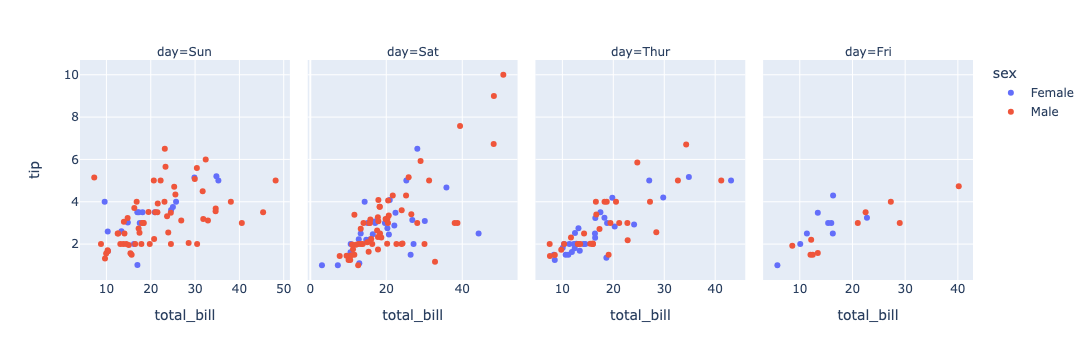

In [26]:
# Scatter plot with color and facet
# https://plotly.com/python/facet-plots/
fig = px.scatter(df, x="total_bill", y="tip", color='sex', facet_col="day")
fig.update_xaxes(matches=None)
fig.show()

## Sunburst plot
- Hierarchical data, e.g., pivoted data, can be displayed as sunbursts.
- These are pie charts with concentric circles marking hierarchical relationships.
- Interactivity is kind of cool here.

```{note}
As for ordinary pie charts, it is very hard to judge the relative sizes of sectors in sunburst plots. 
```

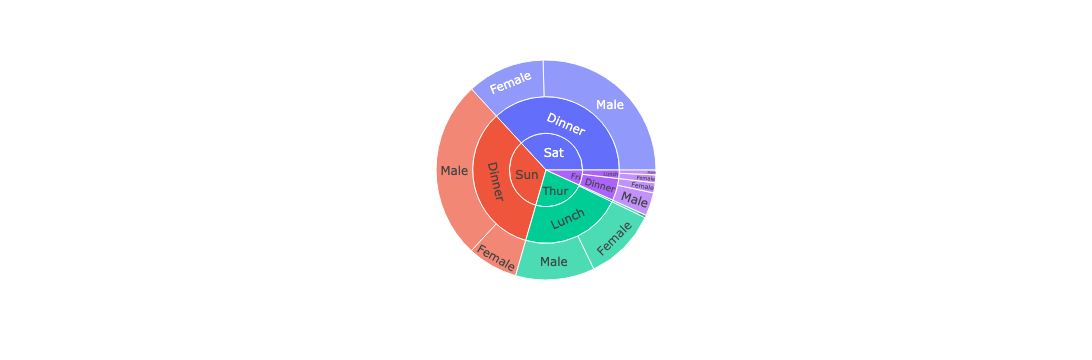

In [27]:
# Sunburst plot
df = px.data.tips()
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

In [28]:
# Read the athlete_events.csv file
import pandas as pd
athletes = pd.read_csv('../../data/athlete_events.csv')
winter = athletes.loc[athletes['Season'] == 'Winter',:]
winter2000 = winter.loc[winter['Year'] >= 2000,:]

# Pivoting step on the summer2000 data
w2sy = winter2000.pivot_table(index='Sport', columns='Year', values='Height', aggfunc='count')

# Remove rows that only contain NaN values
w2sy = w2sy.dropna(how='all')

w2syu = w2sy.unstack().reset_index()
w2syu.columns = ['Year', 'Sport', 'Athletes']
w2syu.head()

Year                 Sport  Athletes
0  2002         Alpine Skiing       551
1  2002              Biathlon       564
2  2002             Bobsleigh       238
3  2002  Cross Country Skiing       766
4  2002               Curling        96

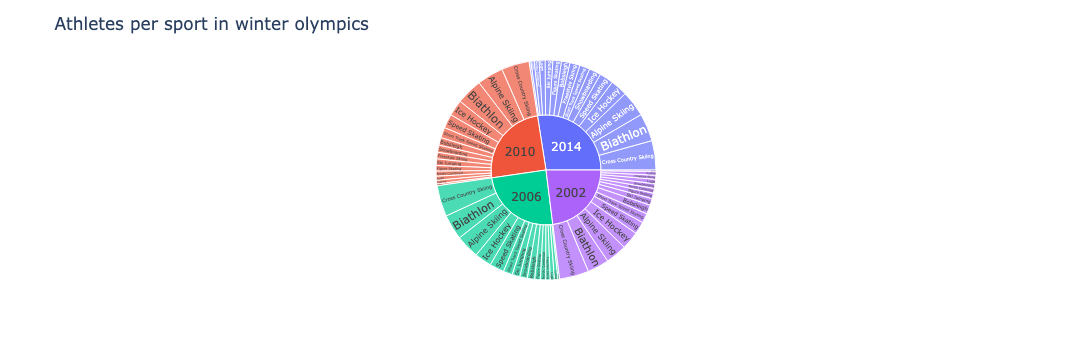

In [29]:
fig = px.sunburst(w2syu, path=['Year', 'Sport'], values='Athletes')
# Add header: "Athletes per sport in winter olympics"
fig.update_layout(title_text='Athletes per sport in winter olympics')
fig.show()

## Parallel coordinates
- Multiple features in a parallel coordinate system.
- Each sample is a line marking values in each feature.
- Colours from classes or continuous feature.
- Interactivity includes marking part of coordinate axis and rearranging coordinate axes.

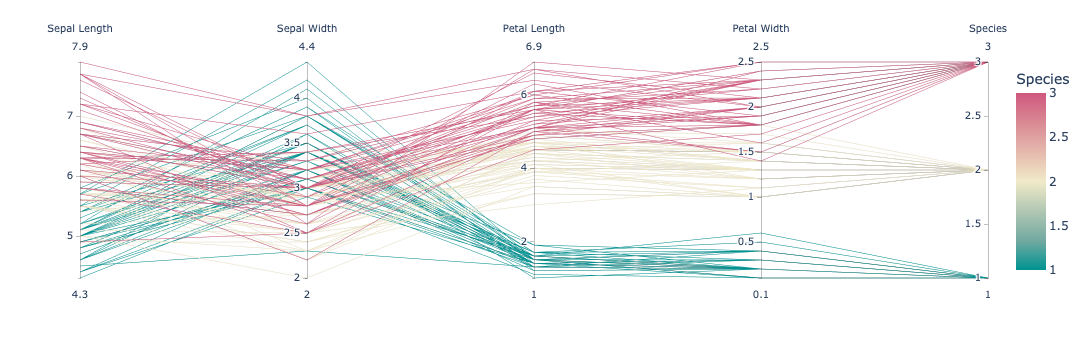

In [30]:
# Use Plotly parallell coordinates to visualize the Iris data
# https://plot.ly/python/parallel-coordinates-plot/
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

## Exercise
- Adjust the above code to include a slider for opacity.

```{seealso} Resources
:class: tip
- [Plotly overview](https://plotly.com/python/)
- [Plotly API reference](https://plotly.com/python-api-reference/index.html)
```